In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

In [46]:
colddata = np.array(np.fromfile('Droom720.dat',dtype='int16')-2**11, dtype = 'int32')

# hotdata = np.fromfile('my_water.dat', dtype = 'int16')-2**11

# colddata = np.fromfile('my_ice.dat', dtype = 'int16')-2**11

In [47]:
data_lst = [ colddata]

In [48]:
def get_stat(data):
    mean_data = np.mean(data)
    median_data = np.median(data)
    std_data = np.std(data)
    var_data = np.var(data)
    
    return "mean", mean_data, "median", median_data,"standard deviation", std_data, "variance",var_data


In [49]:
for i in data_lst:
    print(get_stat(i))

('mean', np.float64(3.15381371), 'median', np.float64(3.0), 'standard deviation', np.float64(54.51770301629193), 'variance', np.float64(2972.1799421726064))


In [ ]:
for data in data_lst:
    data_no_mean = data - np.mean(data)

    # Plot a section of the data
    plt.figure(figsize=(10, 5))
    x = np.linspace(0.01, 0.011, 10000)
    print(len(x))
    plt.scatter(x, data_no_mean[100000:110000], s=5)  # Plot a section of the data
    
    plt.xlabel('Time[s]',fontsize = 18)
    plt.ylabel('ADC Value [bits]',fontsize = 18)
    plt.show()

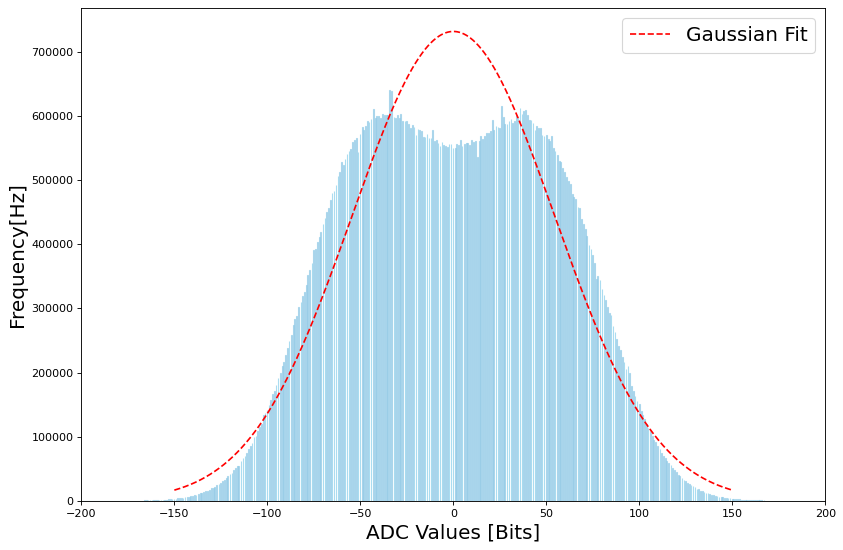

In [ ]:
for data in data_lst:
        ds = data - np.mean(data)

        # Step 5: Overplot the Gaussion Distribution on Each Graph

        # Use the Standard Deviations We Calculated in Step 1
        σg = np.std(ds)
        ʎg = np.mean(ds)

        # Defind x variable for Gaussian Distribution
        xg = np.linspace(-150,150,1000)

        # Simulate Gaussian Distribution by Lambda and Sigma
        yg = norm.pdf(xg, ʎg, σg) * len(ds)


        # Overplot the Poisson Distribution over Each Histogram
        plt.figure(figsize=(12, 8),dpi=80)
        plt.plot(xg, yg, 'r--', 
                label= 'Gaussian Fit')
        plt.hist(ds, bins='auto', edgecolor="skyblue", color='pink', alpha=0.7)
        plt.xlim(-200,200)
        plt.xlabel('ADC Values [Bits]', fontsize=18)
        plt.ylabel('Frequency[Hz]', fontsize=18)
        plt.legend(fontsize=18)
        plt.show()
    


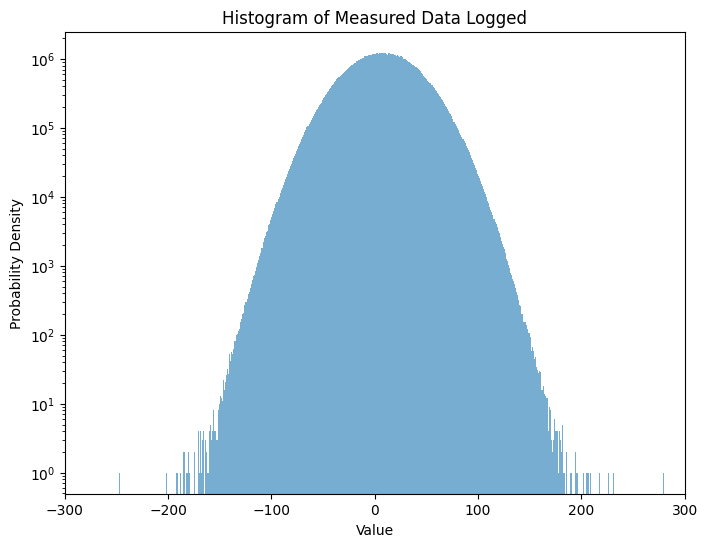

In [105]:
for data in data_lst:
    data_no_mean = data - np.mean(data)

    # Plot histogram of the data
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins= 'auto', alpha=0.6)
    plt.yscale('log')
    plt.title('Histogram of Measured Data Logged')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.xlim(-300,300)
    plt.show()


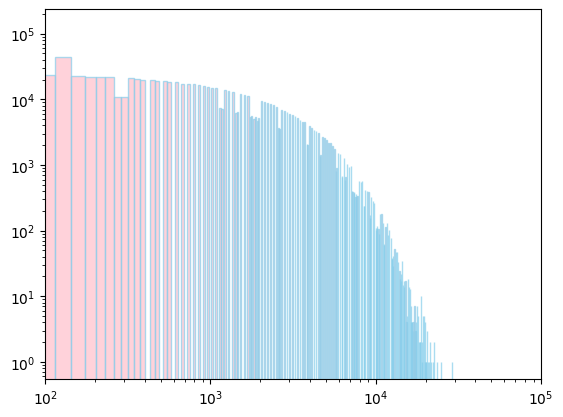

In [60]:

d = data_no_mean[9000000:10000000]
d2 = d**2


# y = np.linspace(0, (max(d2)), 100000)
y = np.linspace(0, max(d2), 10000)
y_scale = len(d)

chi = chi2.pdf(y, df=1) 

vari = np.var(d)
# plt.plot(y, chi * len(d), color='red')
counts, bins, _ = plt.hist(d2, bins=1000, edgecolor="skyblue", color='pink', alpha=0.7)
plt.yscale('log')
plt.xscale('log')

# plt.ylim(1, 10**7)
plt.xlim(100, 100000)

plt.show()


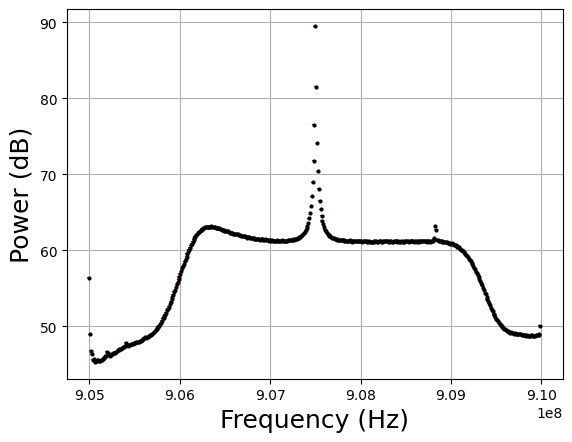

In [52]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024

data = data_no_mean
# Reshape data into smaller chunks of size 1024 (drop excess data if not divisible)
# num_chunks = len(data) // n
num_chunks = 20000
data_chunks = data[:num_chunks * n].reshape(num_chunks, n)

# Initialize arrays to hold the spectrum for averaging
spectrum_sum = np.zeros(n // 2)

# Perform FFT and calculate power for each chunk
for chunk in data_chunks:
    fft_result = np.fft.fft(chunk)
    power_spectrum = np.abs(fft_result[:n // 2])**2  # Only take first n/2 due to symmetry
    spectrum_sum += power_spectrum

# Average the power spectrum
avg_spectrum = spectrum_sum / num_chunks

# Convert to dB
spectrum_db = 10 * np.log10(avg_spectrum)

# Calculate the frequency axis based on the sampling rate (for example 10 MHz sampling)
sampling_rate = 10e6  # 10 MSps
frequencies = np.fft.fftfreq(n, d=1 / sampling_rate)[:n // 2]  # Frequencies corresponding to FFT

# Plot with error bars
plt.errorbar(frequencies + 905e6, spectrum_db, yerr=0.0434, fmt='o',  markersize=2, color='black', ecolor='red', elinewidth=3, capsize=0)
plt.xlabel('Frequency (Hz)', fontsize = 18)
plt.ylabel('Power (dB)', fontsize = 18)
plt.grid(True)
plt.show()



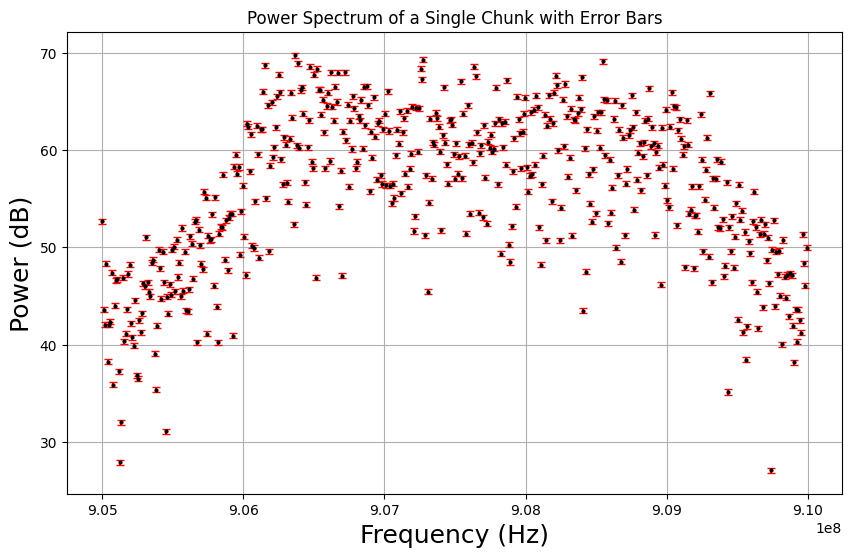

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1024
sampling_rate = 10e6  # 10 MHz sampling rate

# Select a single chunk (first 1024 points) from the data
single_chunk = data_no_mean[:n]

# Perform FFT on the single chunk
fft_result = np.fft.fft(single_chunk)
power_spectrum = np.abs(fft_result[:n // 2])**2  # Only take the first n/2 due to symmetry

# Convert power spectrum to dB scale
spectrum_db = 10 * np.log10(power_spectrum)

# Frequency axis based on the sampling rate
frequencies = np.fft.fftfreq(n, d=1 / sampling_rate)[:n // 2]  # Corresponding frequencies for FFT

# Plot the single spectrum with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(frequencies + 905e6, spectrum_db, yerr=0.26, fmt='o', markersize=2, color='black',
             ecolor='red', elinewidth=1.5, capsize=3)
plt.title('Power Spectrum of a Single Chunk with Error Bars')
plt.xlabel('Frequency (Hz)', fontsize = 18)
plt.ylabel('Power (dB)', fontsize = 18)
plt.grid(True)
plt.show()


hi
hi
hi
hi
hi


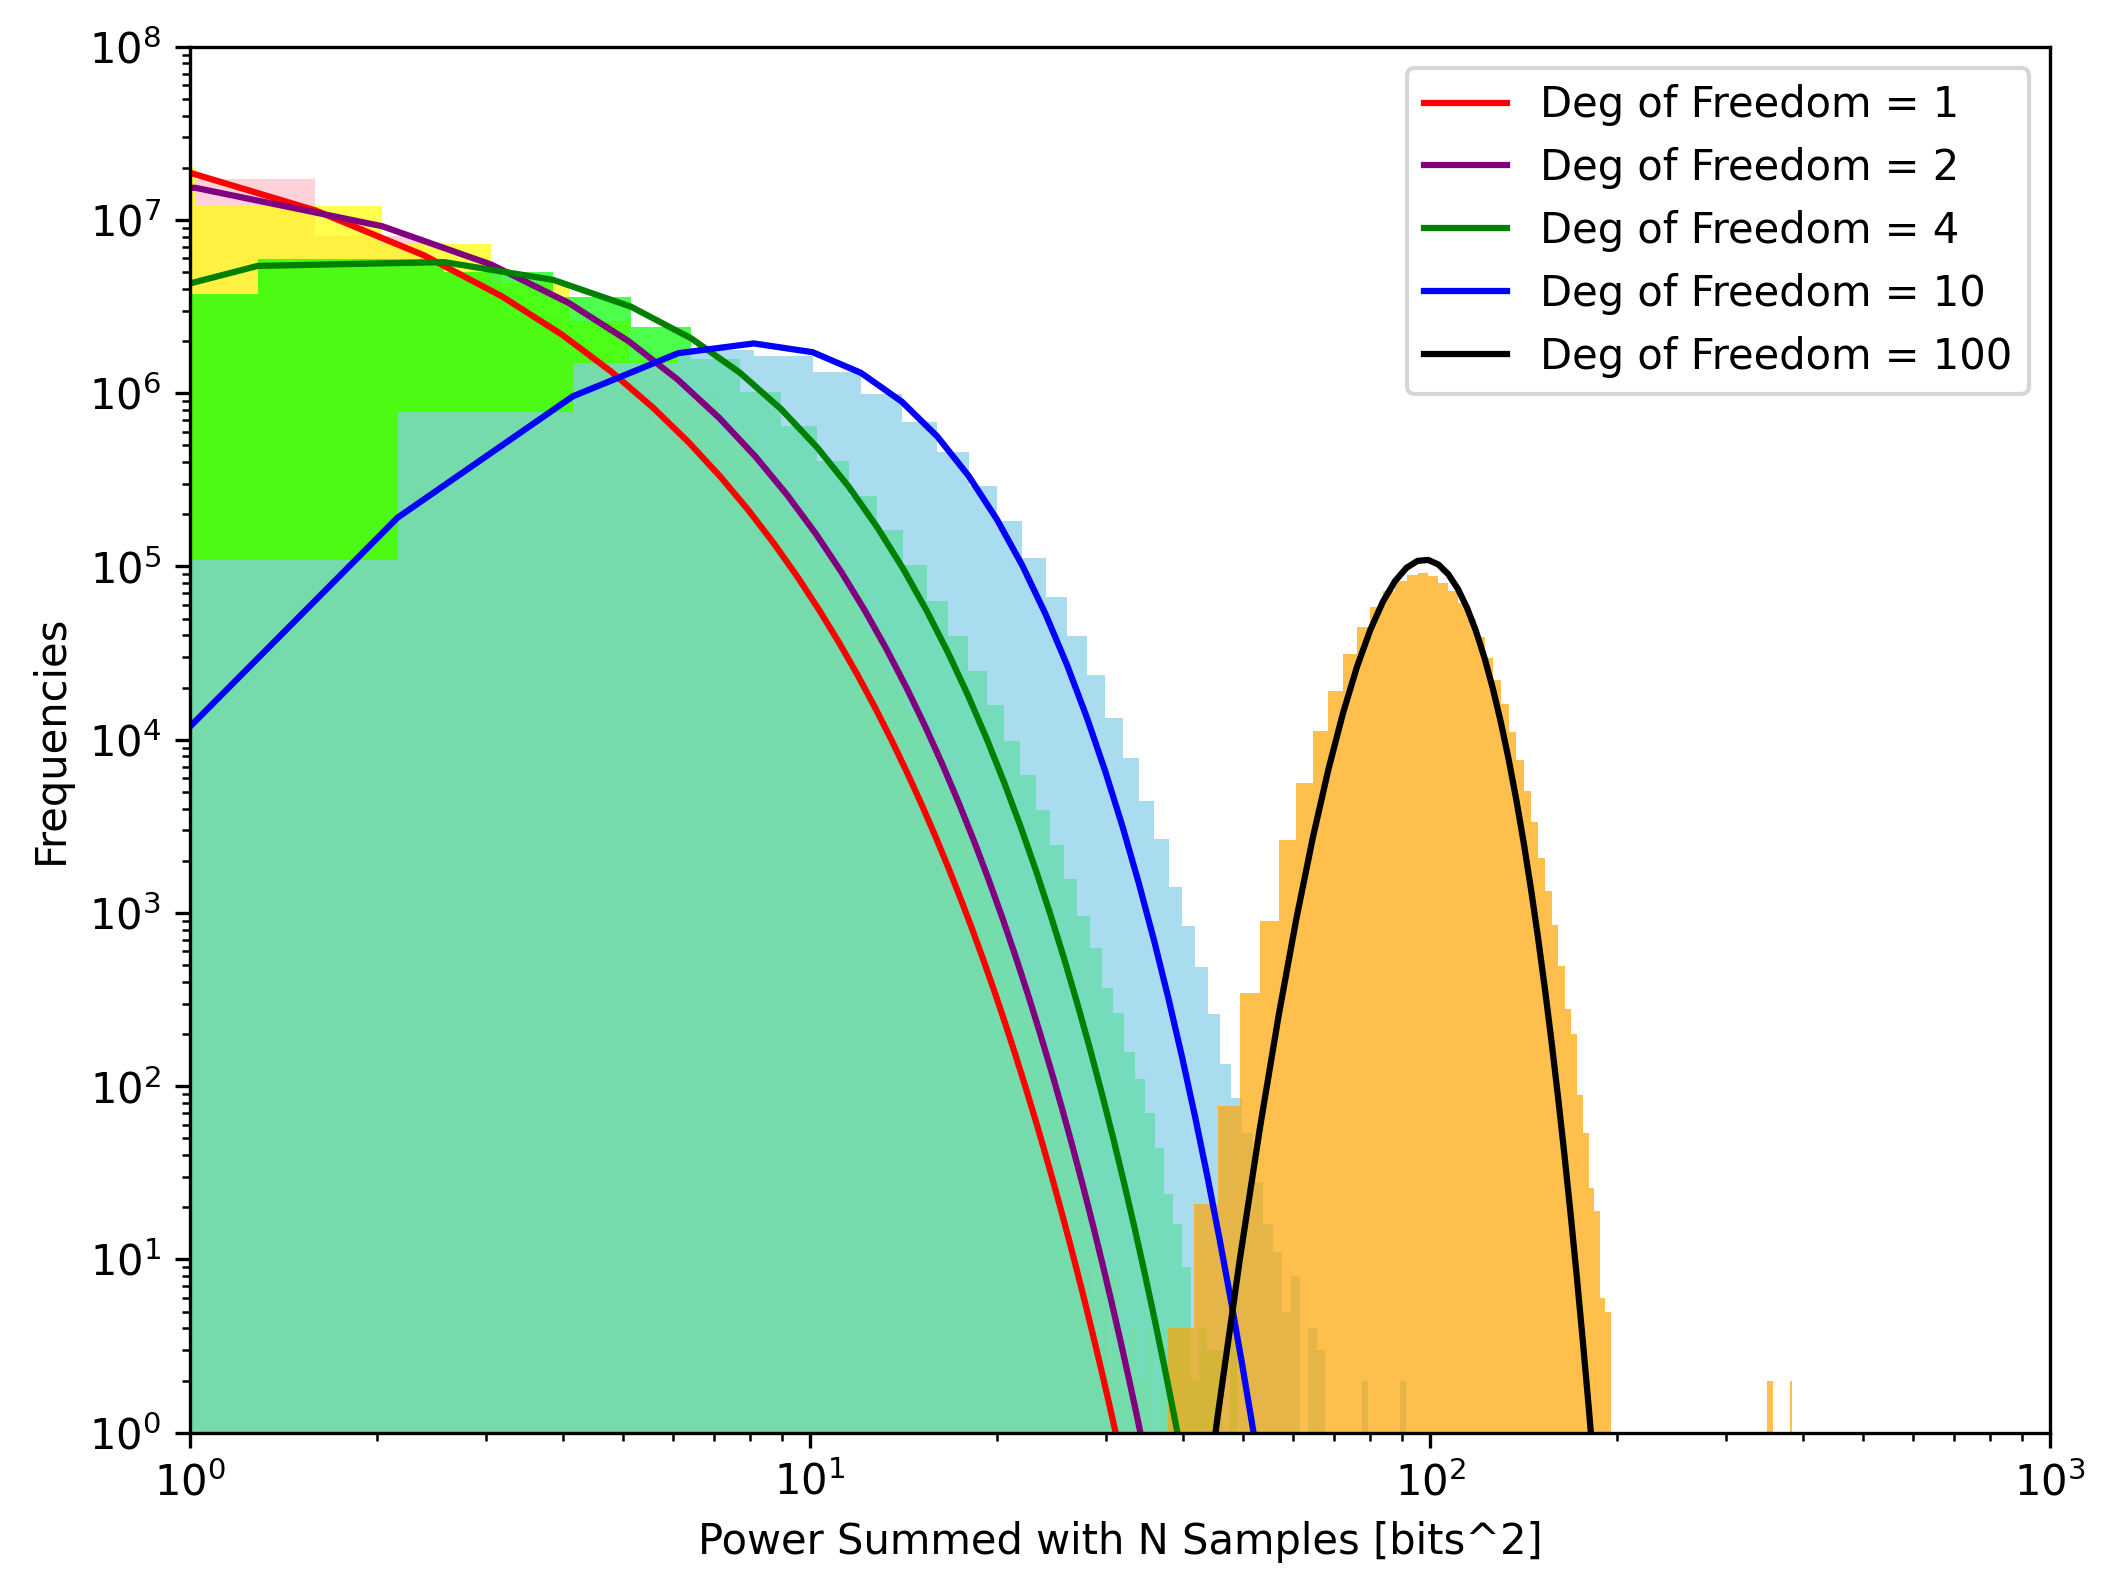

In [ ]:
# Function for grouping the data based on N
def grouping(x,num):
    n=num
    lst = []
    i=0
    x2 = x**2
    if num == 1:
        return x2
    result = np.sum(x2.reshape(-1, num), axis=1)
    return result
   

# Figure Visual Settings
plt.figure(figsize=(8, 6), dpi = 300)
lst = ['red','purple', 'green', 'blue','black']
lst2 = ['pink', 'yellow', 'lime', 'skyblue','orange'] 
idx=[1,2,4,10,100]
# Graph Plotting
for k in range(5):
    index = idx[k]
    dr = data_no_mean/np.std(data_no_mean)
    l = grouping(dr,index)
    step = 300   
    max=np.max(l)
    min= np.min(l)
    hist,edge,patchs= plt.hist(l, bins=step,  color=lst2[k], alpha=0.7)
    width = edge[1]-edge[0]
    #chi
    x = edge[:step]
    chi = chi2.pdf(x, df= index)

    # scale factors
    area = sum(hist*width)
    # rescale chi2.pdf
    y = chi * area
    
    plt.plot(x, y, label=f'Deg of Freedom = {index}', color = lst[k]) 

plt.loglog()
plt.xlabel('Power Summed with N Samples [bits^2]')
plt.ylabel('Frequencies')
plt.legend()
plt.xlim(1,1000)
plt.ylim(10**(0), 10**8)
plt.show()

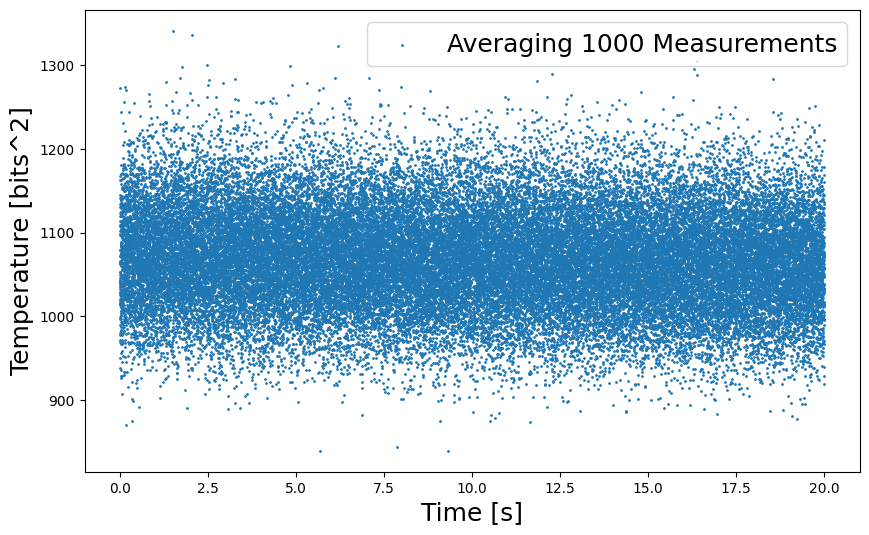

Mean Temperature (non-RFI): 1067.451 [bits^2]
Standard Deviation (non-RFI): 57.362 [bits^2]
Radiometer Equation Uncertainty: 6.820 [bits^2]
Measured Std Dev / Theoretical Uncertainty Ratio: 8.411


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Data parameters
data_no_mean = data - np.mean(data)
data_no_mean = data_no_mean[50000000:]

chunk_size = 1000  # Number of samples to average per measurement
total_chunks = len(data_no_mean) // chunk_size  # Total number of averaged measurements
sample_time = 1e-3  # Assume each sample corresponds to 1 ms
bandwidth = 1 / (2 * sample_time)  # Nyquist bandwidth in Hz

# Step 1: Reshape data into chunks of 1000 for averaging
# This reduces data_no_mean from 100 million points to 100,000 averaged measurements
data_reshaped = data_no_mean[:total_chunks * chunk_size].reshape(total_chunks, chunk_size)
temperature_measurements = np.mean(data_reshaped ** 2, axis=1)  # Averaged power per chunk

# Step 2: Detect and filter RFI (outliers)
mean_temp = np.mean(temperature_measurements)
std_temp = np.std(temperature_measurements)
non_rfi_data = temperature_measurements[np.abs(temperature_measurements - mean_temp) < 3 * std_temp]

# Step 3: Plot the time stream
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 20, len(temperature_measurements)), temperature_measurements, s=1,  label='Averaging 1000 Measurements')
plt.xlabel('Time [s]', fontsize=18)
plt.ylabel('Temperature [bits^2]', fontsize=18)
plt.legend(fontsize=18)
plt.show()

# Step 4: Calculate statistics and radiometer uncertainty
mean_temperature = np.mean(non_rfi_data)
std_temperature = np.std(non_rfi_data)
total_time = total_chunks * sample_time  # Total time covered in seconds
radiometer_uncertainty = mean_temperature / np.sqrt(total_time * bandwidth)

# Output results
print(f"Mean Temperature (non-RFI): {mean_temperature:.3f} [bits^2]")
print(f"Standard Deviation (non-RFI): {std_temperature:.3f} [bits^2]")
print(f"Radiometer Equation Uncertainty: {radiometer_uncertainty:.3f} [bits^2]")
print(f"Measured Std Dev / Theoretical Uncertainty Ratio: {std_temperature / radiometer_uncertainty:.3f}")


Text(0, 0.5, 'System Temperature [bits^2]')

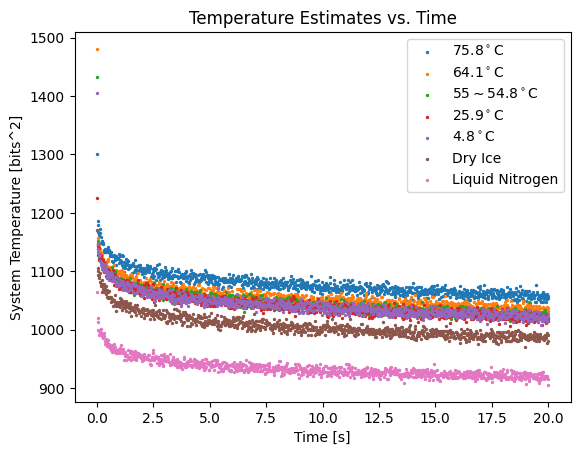

In [70]:
data_hot_76 = np.fromfile('D76.dat',dtype='int16')-2**11
data_hot_642 = np.fromfile('D642.dat',dtype='int16')-2**11
data_hot_55 = np.fromfile('D55.dat',dtype='int16')-2**11
data_cold = np.fromfile('Dcold4.8.dat',dtype='int16')-2**11
data = np.fromfile('Droom2.dat',dtype='int16')-2**11
data_ice = np.fromfile('Ddryice.dat',dtype='int16')-2**11
data_Ni = np.fromfile('Dnitro.dat',dtype='int16')-2**11
# Timetream of powers
def avg_values(T_data, end_time = 20):
    """Retrun an array that takes average of every 100000 measurements. Also, return the time domain.
    """
    i = 0
    avg_lst = []
    while i < len(T_data):
        avgi = np.mean(T_data[i:i+100000])
        avg_lst.append(avgi)
        i+=100000
    avg_value = np.array(avg_lst)
    time_array = np.linspace(0,end_time,len(avg_value))
    return avg_value, time_array


data_hot_76_pow = data_hot_76**2
data_hot_76_pow_avg, time = avg_values(data_hot_76_pow)
plt.scatter(time, data_hot_76_pow_avg, s=2, label=r'$75.8^\circ \mathrm{C}$')

# data_hot_70_pow = data_hot_70**2
# data_hot_70_pow_avg, time = avg_values(data_hot_70_pow)
# plt.scatter(time, data_hot_70_pow_avg, s=2, label=r'$70\sim69.8^\circ \mathrm{C}$')


data_hot_642_pow = data_hot_642**2
data_hot_642_pow_avg, time = avg_values(data_hot_642_pow)
plt.scatter(time, data_hot_642_pow_avg, s=2, label=r'$64.1^\circ \mathrm{C}$')


# data_hot_60_pow = data_hot_60**2
# data_hot_60_pow_avg, time = avg_values(data_hot_60_pow)
# plt.scatter(time, data_hot_60_pow_avg, s=2, label=r'$60\sim59.8^\circ \mathrm{C}$')


data_hot_55_pow = data_hot_55**2
data_hot_55_pow_avg, time = avg_values(data_hot_55_pow)
plt.scatter(time, data_hot_55_pow_avg, s=2, label=r'$55\sim54.8^\circ \mathrm{C}$')

data_pow = data**2 - 50
data_pow_avg, time = avg_values(data_pow)
plt.scatter(time, data_pow_avg, s=2, label=r'$25.9^\circ \mathrm{C}$')

data_cold_pow = data_cold**2
data_cold_pow_avg, time = avg_values(data_cold_pow)
plt.scatter(time, data_cold_pow_avg, s=2, label=r'$4.8^\circ\mathrm{C}$')


data_ice_pow = data_ice**2
data_ice_pow_avg, time = avg_values(data_ice_pow)
plt.scatter(time, data_ice_pow_avg, s=2, label=r'Dry Ice')


data_Ni_pow = data_Ni**2
data_Ni_pow_avg, time = avg_values(data_Ni_pow)
plt.scatter(time, data_Ni_pow_avg, s=2, label=r'Liquid Nitrogen')

plt.title('Temperature Estimates vs. Time')
plt.xlabel('Time [s]')
plt.legend()
plt.ylabel('System Temperature [bits^2]')

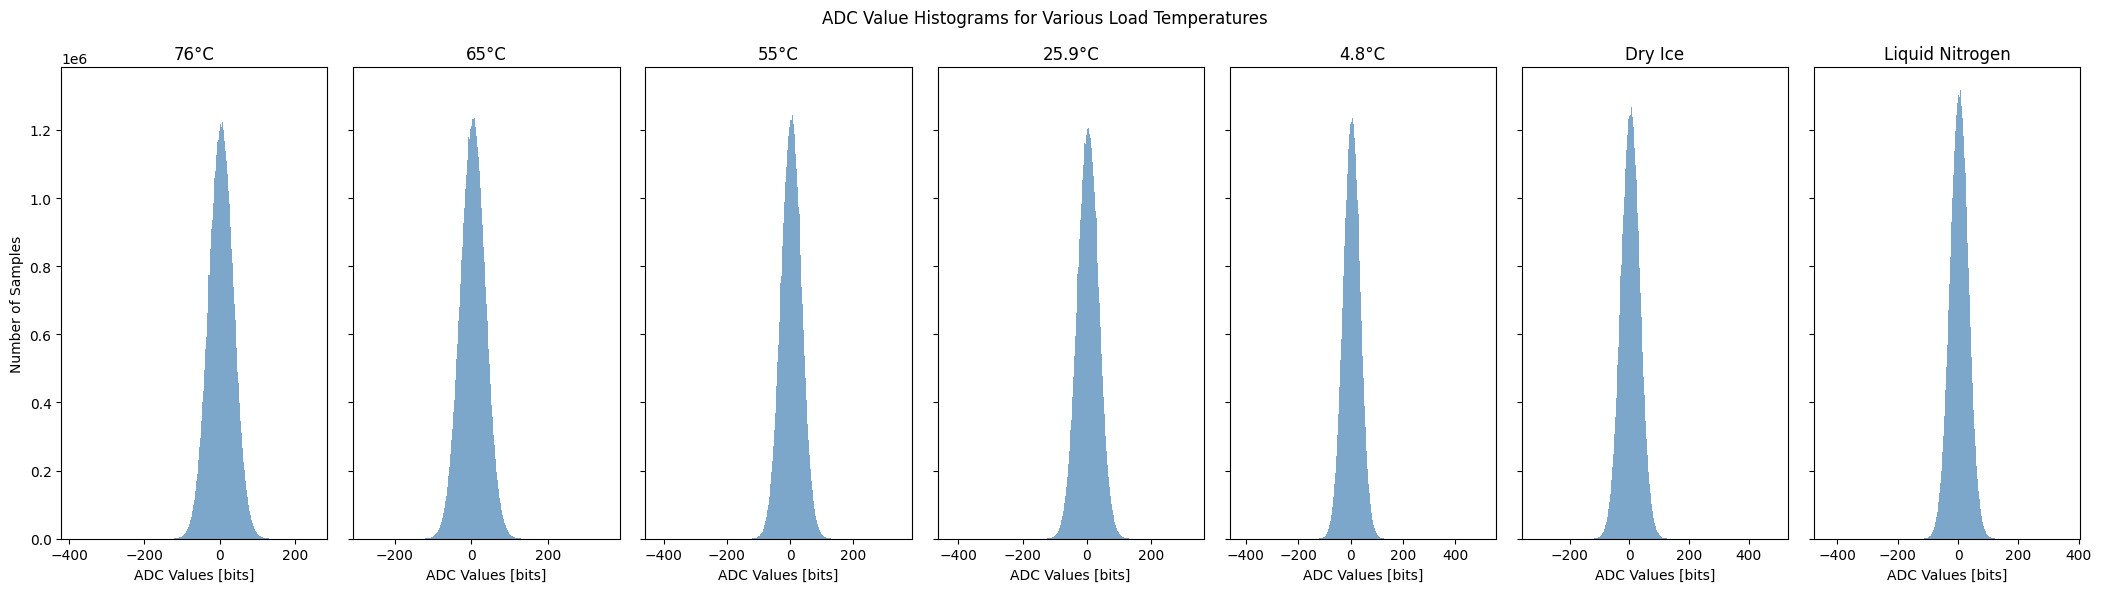

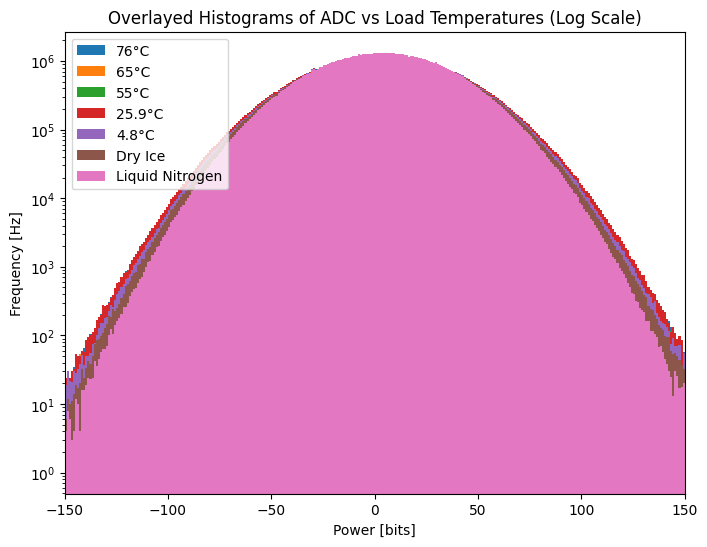

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_hot_76 = np.fromfile('D76.dat', dtype='int16') - 2**11
data_hot_65 = np.fromfile('D642.dat', dtype='int16') - 2**11
data_hot_55 = np.fromfile('D55.dat', dtype='int16') - 2**11
data_room = np.fromfile('Droom2.dat', dtype='int16') - 2**11
data_cold = np.fromfile('Dcold4.8.dat', dtype='int16') - 2**11
data_ice = np.fromfile('Ddryice.dat', dtype='int16') - 2**11
data_Ni = np.fromfile('Dnitro.dat', dtype='int16') - 2**11

# Plot individual histograms
fig, axs = plt.subplots(1, 7, figsize=(21, 6), sharey=True)
temperature_data = [
    (data_hot_76, '76°C'),
    (data_hot_65, '65°C'),
    (data_hot_55, '55°C'),
    (data_room, '25.9°C'),
    (data_cold, '4.8°C'),
    (data_ice, 'Dry Ice'),
    (data_Ni, 'Liquid Nitrogen')
]

for i, (data, label) in enumerate(temperature_data):
    axs[i].hist(data, bins='auto', color='steelblue', alpha=0.7)
    axs[i].set_title(f"{label}")
    axs[i].set_xlabel("ADC Values [bits]")
    if i == 0:
        axs[i].set_ylabel("Number of Samples")

fig.suptitle("ADC Value Histograms for Various Load Temperatures")
plt.tight_layout()
plt.show()

# Overlayed Logarithmic Histogram
plt.figure(figsize=(8, 6))
for data, label in temperature_data:
    plt.hist(data, bins='auto', label=label, log=True)

plt.xlabel("Power [bits]")
plt.ylabel("Frequency [Hz]")
plt.title("Overlayed Histograms of ADC vs Load Temperatures (Log Scale)")
plt.legend()
plt.xlim(-150,150)
plt.show()


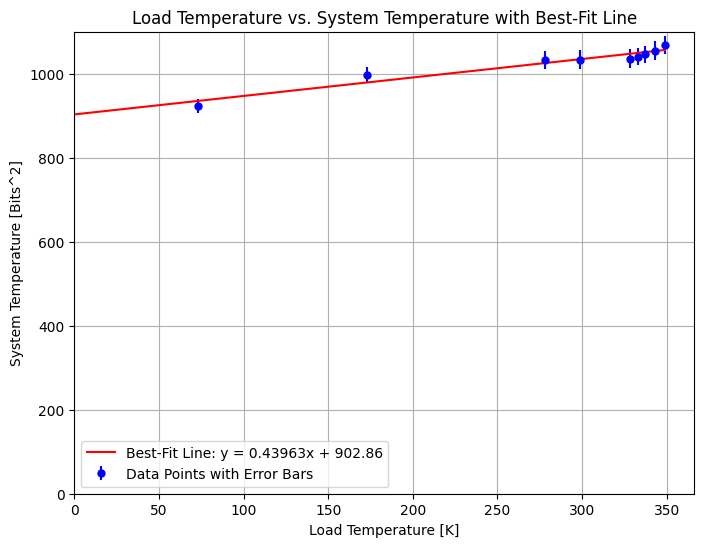

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Load temperature data in Celsius (converted to Kelvin by adding 273.15)
x_celsius = np.array([75.8, 69.9, 64.1, 59.9, 54.9, 25.9, 4.8, -100, -200])
x = x_celsius + 273.15  # Convert to Kelvin

# ADC Variance in bits^2
y = np.array([1068.92, 1054.90, 1045.46, 1040.34, 1035.21, 1033.51, 1032.11, 996.59, 923.75])

# Error percentages for ADC Variance
y_error_percentage = np.array([2.0, 2.1, 2.0, 2.0, 2.2, 2.1, 2.1, 2.0, 1.8])  # Example percentages

# Convert error percentages to absolute values
y_error = y * (y_error_percentage / 100)  # Convert percentage to absolute error

# Linear regression calculations
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_xy = np.sum(x * y)

slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
intercept = (sum_y - slope * sum_x) / n

# Calculate extended x-values including 0 for best-fit line
x_fit = np.linspace(0, np.max(x), 100)  # Extends the fit line from x=0 to max(x)

# Calculate fitted values for the extended x-range
y_fit = slope * x_fit + intercept

# Plot the data points, best-fit line, and error bars
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=y_error, fmt='o', color='blue', markersize=5, label='Data Points with Error Bars')
plt.plot(x_fit, y_fit, color='red', label=f'Best-Fit Line: y = {slope:.5f}x + {intercept:.2f}')
plt.xlabel('Load Temperature [K]')
plt.ylabel('System Temperature [Bits^2]')
plt.title('Load Temperature vs. System Temperature with Best-Fit Line')
plt.legend()
plt.grid(True)

# Set both axes to start from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()


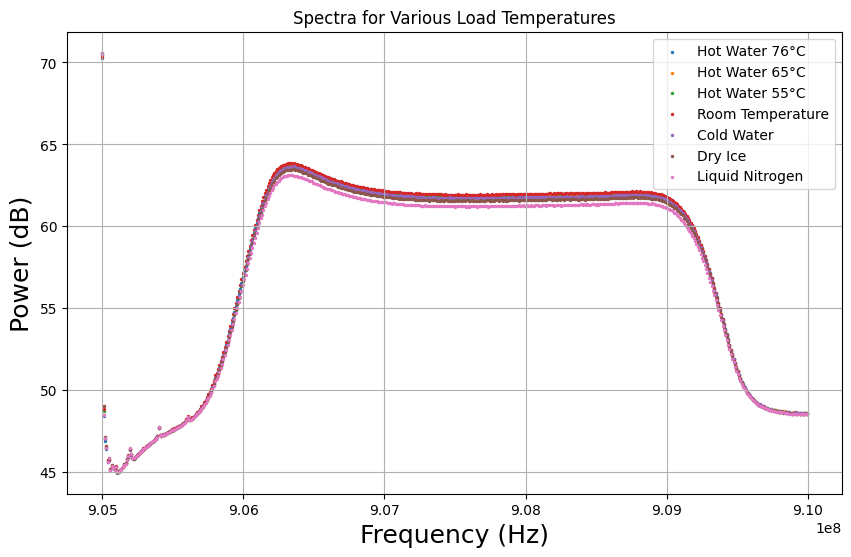

Receiver gain (slope): 0.47566 bits^2/K
Receiver intrinsic temperature (intercept): 901.42 bits^2


In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_hot_76 = np.fromfile('D76.dat', dtype='int16') - 2**11
data_hot_65 = np.fromfile('D642.dat', dtype='int16') - 2**11
data_hot_55 = np.fromfile('D55.dat', dtype='int16') - 2**11
data_room = np.fromfile('Droom2.dat', dtype='int16') - 2**11
data_cold = np.fromfile('Dcold4.8.dat', dtype='int16') - 2**11
data_ice = np.fromfile('Ddryice.dat', dtype='int16') - 2**11
data_Ni = np.fromfile('Dnitro.dat', dtype='int16') - 2**11

# Define a function to calculate the averaged power spectrum
def calculate_spectrum(data, n=1024, sampling_rate=10e6):
    # Reshape data into smaller chunks of size `n`
    num_chunks = len(data) // n
    data_chunks = data[:num_chunks * n].reshape(num_chunks, n)
    
    # Initialize arrays to hold the spectrum for averaging
    spectrum_sum = np.zeros(n // 2)
    
    # Perform FFT and calculate power for each chunk
    for chunk in data_chunks:
        fft_result = np.fft.fft(chunk)
        power_spectrum = np.abs(fft_result[:n // 2])**2  # Only take first n/2 due to symmetry
        spectrum_sum += power_spectrum
    
    # Average the power spectrum
    avg_spectrum = spectrum_sum / num_chunks
    
    # Convert to dB
    spectrum_db = 10 * np.log10(avg_spectrum)
    
    # Frequency axis based on the sampling rate
    frequencies = np.fft.fftfreq(n, d=1 / sampling_rate)[:n // 2]
    
    return frequencies, spectrum_db

# Dictionary of datasets for each load temperature
datasets = {
    'Hot Water 76°C': data_hot_76,
    'Hot Water 65°C': data_hot_65,
    'Hot Water 55°C': data_hot_55,
    'Room Temperature': data_room,
    'Cold Water': data_cold,
    'Dry Ice': data_ice,
    'Liquid Nitrogen': data_Ni
}

# Sampling rate
sampling_rate = 10e6  # 10 MSps

# Plot spectra for each dataset
plt.figure(figsize=(10, 6))
for label, data in datasets.items():
    frequencies, spectrum_db = calculate_spectrum(data, n=1024, sampling_rate=sampling_rate)
    plt.scatter(frequencies + 905e6, spectrum_db, s=2, label=label)  # Offset by LO frequency if needed

# Add labels, title, and grid
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Power (dB)', fontsize=18)
plt.title('Spectra for Various Load Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Calculate receiver gain and temperature across spectral bins
load_temps = np.array([76, 65, 55, 25.9, 4.8, -100, -200]) + 273.15  # Convert to Kelvin
variances = np.array([np.var(data_hot_76), np.var(data_hot_65), np.var(data_hot_55),
                      np.var(data_room), np.var(data_cold), np.var(data_ice), np.var(data_Ni)])

# Perform linear fit to get receiver gain and intrinsic temperature
slope, intercept = np.polyfit(load_temps, variances, 1)
print(f"Receiver gain (slope): {slope:.5f} bits^2/K")
print(f"Receiver intrinsic temperature (intercept): {intercept:.2f} bits^2")


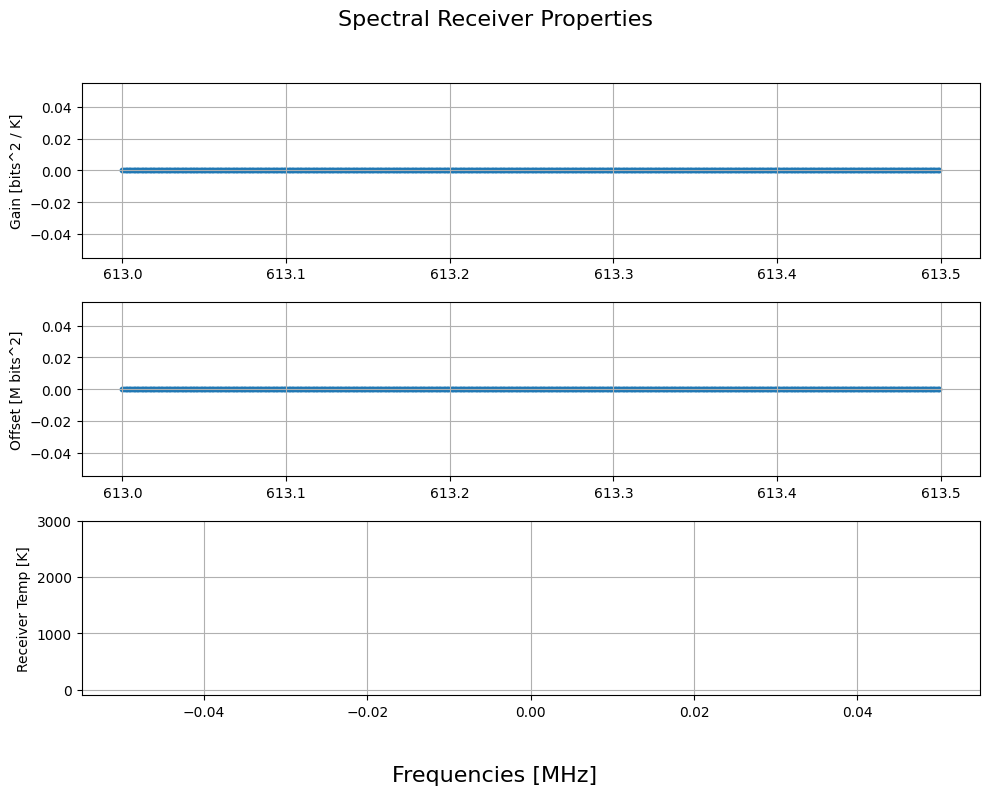

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regression function with error handling for zero slope
def lin_reg(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)
    denominator = n * sum_xx - sum_x**2
    if denominator == 0:
        return 0, np.mean(y)  # Return 0 slope and average y as intercept if denominator is zero
    m = (n * sum_xy - sum_x * sum_y) / denominator
    b = (sum_y - m * sum_x) / n
    return m, b

# Initialize variables and data
selected_tempC = [-196, -109.3, 4.8, 25.6, 55, 64.2, 76]
selected_tempK = 273.15 + np.array(selected_tempC)
collection_avg_psd = np.zeros((512, 7))  # Placeholder for PSD values; replace with actual data

# Initialize result arrays
gain = np.zeros(512)
rec_temp = np.zeros(512)
offset = np.zeros(512)

# Calculate gain, offset, and receiver temperature for each frequency bin
for i in range(512):
    y = collection_avg_psd[i]  # PSD for the i-th frequency bin across temperatures
    x = selected_tempK
    m, itcp = lin_reg(x, y)
    gain[i] = m
    offset[i] = itcp
    rec_temp[i] = itcp / m if m != 0 else np.nan  # Avoid division by zero

# Frequency axis (replace `chunk_size` if not defined)
chunk_size = 1024
lo_frequency = 613  # Local oscillator frequency in MHz
frequencies = lo_frequency + np.fft.fftfreq(chunk_size, d=1)[:512]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Subplot 1: Gain
axs[0].scatter(frequencies, gain, s=10)
axs[0].set_ylabel('Gain [bits^2 / K]')
axs[0].grid(True)

# Subplot 2: Offset
axs[1].scatter(frequencies, offset / 10**6, s=10)
axs[1].set_ylabel('Offset [M bits^2]')
axs[1].grid(True)

# Subplot 3: Receiver Temperature
axs[2].scatter(frequencies, rec_temp, s=10)
axs[2].set_ylabel('Receiver Temp [K]')
axs[2].set_ylim(-100, 3000)
axs[2].grid(True)

# Set common x-label and title
fig.supxlabel('Frequencies [MHz]', fontsize=16)
fig.suptitle('Spectral Receiver Properties', fontsize=16)

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

